<a href="https://colab.research.google.com/github/0x1beef/uap/blob/main/src/gofast_ranging.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a href="https://kaggle.com/kernels/welcome?src=https://github.com/0x1beef/uap/blob/main/src/gofast_ranging.ipynb">
    <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"   />
</a>

# Download Sitrec, set it up for running scripts

In [44]:
# download only what's needed for the script
!git clone --no-checkout --filter=tree:0 https://github.com/MickWest/sitrec.git
!cd sitrec && git sparse-checkout set --no-cone /src /config* /package* /data/gofast
!cd sitrec && cp config.js.example config.js

Cloning into 'sitrec'...
remote: Enumerating objects: 969, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 969 (delta 2), reused 315 (delta 2), pack-reused 634 (from 1)
Receiving objects: 100% (969/969), 186.90 KiB | 8.13 MiB/s, done.
Resolving deltas: 100% (3/3), done.
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 79 (delta 0), reused 24 (delta 0), pack-reused 33 (from 1)
Receiving objects: 100% (79/79), 20.92 KiB | 10.46 MiB/s, done.
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 276 (delta 1), reused 37 (delta 1), pack-reused 100 (from 1)
Receiving objects: 100% (276/276), 1.20 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (14/14), done.
remote: Enumerating objects: 1, done.
remote: Total 1 (delta 0), reuse

In [2]:
!curl -fsSL https://bun.sh/install | bash

import os
os.environ['PATH'] = "~/.bun/bin:" + os.environ['PATH']

######################################################################## 100.0%
bun was installed successfully to ~/.bun/bin/bun 

Added "~/.bun/bin" to $PATH in "~/.bashrc" 

To get started, run: 

  source /root/.bashrc 
  bun --help 


In [3]:
!cd sitrec && bun install --production

bun install v1.1.37 (8ca0eb83)
[15.93ms] migrated lockfile from package-lock.json
  📦 Installing [58/59]   📦 Installing [59/59] 
+ astronomy-engine@2.1.19
+ axios@1.7.7
+ buffer@6.0.3
+ geotiff@2.1.3
+ jquery@3.7.1
+ js-md5@0.8.3
+ json-stringify-pretty-compact@4.0.0
+ mathjs@13.2.3
+ ndarray@1.0.19
+ ndarray-pack@1.2.1
+ omggif@1.0.10
+ ppm@0.0.0
+ satellite.js@5.0.0
+ seedrandom@3.0.5
+ stats.js@0.17.0
+ stream@0.0.3
+ three@0.166.1
+ three-text2d@0.6.0

58 packages installed [736.00ms]


# Get the GoFast data

In [4]:
%%writefile gofast.js
// note: the Sitrec internal API may change over time
import { initSitch } from "./sitrec/src/indexCommon.js"
import { NodeMan } from "./sitrec/src/Globals.js"
import { Sit } from "./sitrec/src/Globals.js"
import { jetRollFromFrame } from "./sitrec/src/JetStuff.js"
import csv from "./sitrec/src/js/jquery.csv.js"
import fs from "node:fs"

await initSitch("gofast", "SitGoFast.js")

const jetTrack_node = NodeMan.get("jetTrack")
const targetTrack_node = NodeMan.get("LOSTraverseSelect")

var data = [["jet", "target", "jet_roll"]]
for(let frame = 0; frame < Sit.frames; frame++) {
    const pj = jetTrack_node.getValueFrame(frame).position.toArray()
    const pt = targetTrack_node.getValueFrame(frame).position.toArray()
    const jet_roll = jetRollFromFrame(frame)
    data.push([pj, pt, jet_roll])
}

const csv_text = csv.fromArrays(data)
fs.writeFileSync("sitrec_data.csv", csv_text)

Writing gofast.js


In [5]:
!bun gofast.js

Running as a console application
SITREC_DOMAIN = https://localhost/
SITREC_ROOT = ./sitrec/
SITREC_SERVER = https://https://localhost//sitrec/sitRecServer/
REQUIRING _configParams in config.js
Instantiating CNodeManager
CUnits: changeUnits: nautical
CUnits: changeUnits: to nauticalfrom lastUnits: undefined
Setting units to:  Nautical
CUnits: changeUnits: Nautical
++++++++++++++++++++ Loading assets for  gofast  ++++++++++++++++++++++
++++ Loading asset  GoFastBank  from  gofast/Go Fast Tilt tracking.csv
>>> loadAsset() Loading Started: ./sitrec/data/gofast/Go Fast Tilt tracking.csv GlobPars=NaN id=GoFastBank
<<< loadAsset() Loading Finished: ./sitrec/data/gofast/Go Fast Tilt tracking.csv id=GoFastBank
parseAsset(./sitrec/data/gofast/Go Fast Tilt tracking.csv,GoFastBank,<buffer>)
parseAsset: DONE Parse ./sitrec/data/gofast/Go Fast Tilt tracking.csv
<<< loadAsset() parsing Finished: ./sitrec/data/gofast/Go Fast Tilt tracking.csv GlobPars=NaN id=GoFastBank
++++ Loading asset  GoFastAz  fr

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("sitrec_data.csv")
df = df.map(lambda p : p if type(p) != str else np.array(p.split(','), np.float64))
df

,jet,target,jet_roll
0,"[-8.36735125631094e-11, 7620.000000000024, -6....","[-6367.773646828709, 4008.5426322175367, 6036....",1.527525
1,"[-4.212517353613458, 7620.000002023279, 0.8815...","[-6366.668329104983, 4008.559460527884, 6036.0...",1.528327
2,"[-8.425077159119885, 7620.000001145984, 1.7627...","[-6365.563011381258, 4008.576288838231, 6036.1...",1.528835
3,"[-12.637679424331337, 7619.99999736818, 2.6436...","[-6364.457693657531, 4008.593117148578, 6036.2...",1.527849
4,"[-16.8503241487972, 7619.999990689906, 3.52428...","[-6363.352375933805, 4008.6099454589253, 6036....",1.512415
...,...,...,...
1026,"[-4249.616109483217, 7618.467617571645, 1247.8...","[-5233.717662285719, 4025.8084786336412, 6105....",-19.541992
1027,"[-4253.493390928216, 7618.464607833697, 1250.0...","[-5232.612344561992, 4025.8253069439884, 6105....",-19.728483
1028,"[-4257.369256335661, 7618.46159517598, 1252.26...","[-5231.507026838266, 4025.8421352543355, 6105....",-19.928241
1029,"[-4261.243688589772, 7618.458579600991, 1254.4...","[-5230.401709114541, 4025.8589635646827, 6105....",-20.167304


# Constant Velocity Passive Ranging 

In [ ]:
import numpy as np

# if at time t[i] the camera is at 3D position C[i]
# and the LOS towards the target is the unit vector L[i]
# return the speed and distance to the target at t[0]
# assuming the target's velocity is constant
def constant_velocity_ranging(t, C, L):
    n = len(t)
    # If P[i] is the target's postion at t[i]
    # and d is the distance to the target at t[0] then
    # P[0] = C[0] + d L[0] (1)
    # Given the constant velocity vector V we also have
    # P[i] = P[0] + V (t[i]-t[0]) (2)
    # Since P[i] must be along the line of sight L[i] from C[i]
    # (P[i] - C[i]) x L[i] = 0 (3)
    # Substituting (1),(2) into (3) and rearranging we get
    # d L[0]xL[i] + V x L[i] (t[i]-t[0]) = (C[i]-C[0]) x L[i]
    # This is a system of 3*(n-1) linear equations which we
    # represent as A X = B where X = (d,Vx,Vy,Vz)
    # and solve for X using linear least squares.
    (eqs, vars) = (3*(n-1), 4)
    A = np.zeros(shape=[eqs,vars])
    B = np.zeros(shape=[eqs,1])
    for i in range(1, n):
        eq = 3*(i-1)
        L0xLi = np.cross(L[0], L[i])
        dt = t[i]-t[0]
        # V x L = (Vy Lz - Vz Ly, Vz Lx - Vx Lz, Vx Ly - Vy Lz)
        A[eq:eq+3] = np.array([
            [ L0xLi[0],  0,          dt*L[i,2], -dt*L[i,1] ],
            [ L0xLi[1], -dt*L[i,2],  0,          dt*L[i,0] ],
            [ L0xLi[2],  dt*L[i,1], -dt*L[i,0],  0 ]
        ])
        B[eq:eq+3,0] = np.cross(C[i]-C[0], L[i])
    ret = np.linalg.lstsq(A,B,rcond=None)
    X = ret[0]
    d = X[0,0]
    V = X[1:]
    v = np.linalg.norm(V)
    debug_info = { 'A': A, 'B': B, 'ret': ret }
    return (v, d, debug_info)

# Tracking Error Model

In [8]:
import math

def get_heading_from_az_el(az,el):
    (az,el) = (math.radians(az), math.radians(el))
    x = math.cos(el) * math.sin(az)
    y = math.sin(el)
    z = math.cos(el) * math.cos (az)
    return np.array([x,y,-z])

def get_az_el_from_heading(v):
    (vx,vy,vz) = (v[0],v[1],v[2])
    el = math.atan2(vy, math.sqrt(vz*vz + vx*vx))
    az = math.atan2(vx,-vz)
    return (math.degrees(az), math.degrees(el))

# return a randomly adjusted line of sight (L), given
# the standard deviation of the tracking error in pixels
def add_tracking_error(L, pixels):
    FOV = 0.7
    img_size = 480 # original sensor size
    # angle corresponding to the given number of pixels:
    err = FOV / img_size * pixels
    # we sample two numbers from a normal distribution
    # whose standard deviation is 'err', centered around 0
    E = np.random.normal(0.0, err, 2)
    (az,el) = get_az_el_from_heading(L) + E
    return get_heading_from_az_el(az,el)

# calculate the noisy lines of sight only once
# and store the results in the dataframe
def add_tracking_errors(track_error):
    def los_err_for_row(r):
        return add_tracking_error(r.target - r.jet, track_error)
    df['Lerr'] = df.apply(los_err_for_row, axis=1)

def frame_to_time(frame):
    return frame / 29.97
def time_to_frame(time):
    return time * 29.97

# for the given set of frame indices
# return the frame times, camera positions and lines of sight.
def get_tCL(frames):
    n = len(frames)
    t = np.zeros(shape=[n])
    C = np.zeros(shape=[n,3])
    L = np.zeros(shape=[n,3])
    for i in range(n):
        t[i] = frame_to_time(frames[i])
        data = df.loc[frames[i]]
        C[i] = data.jet
        L[i] = data.Lerr # from add_tracking_errors 
    return (t,C,L)

def print_mat(name, M):
    print(name, M.shape, '=\n', M)
    
def debug_tCL(t,C,L):
    print_mat('t',t)
    print_mat('C',C)
    print_mat('L',L)

def debug_lstsq(info):
    (A,B,ret) = (info['A'],info['B'],info['ret'])
    X = ret[0]
    print_mat('A',A)
    print_mat('B',B)
    print_mat('X',X)
    print(ret)
    print('cond', np.linalg.cond(A))
    print(np.linalg.norm(B - A @ X))

# convert meters to nautical miles
def m_to_nm(meters):
    return meters / 1852

# convert meters per second to knots
def mps_to_knots(meters_per_sec):
    return meters_per_sec * 1.94384

# get an average range estimate for a set of frames
def get_range_for_frames(frames, debug = 0):
    (t,C,L) = get_tCL(frames)
    if debug >= 3: debug_tCL(t,C,L)
    (v,d,debug_info) = constant_velocity_ranging(t,C,L)
    (v,d) = (mps_to_knots(v), m_to_nm(d))
    if debug >= 2: debug_lstsq(debug_info)
    if debug >= 1: print(f'd = {d:.2f} nm, v = {v:.2f} knots')
    return d

# Plot the Passive Ranging for GoFast

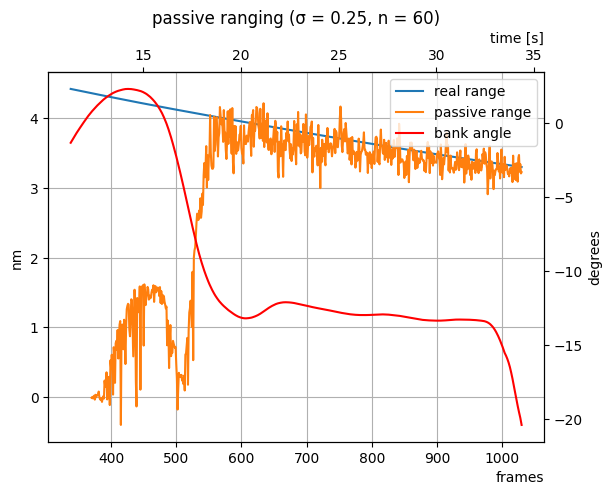

In [12]:
import matplotlib.pyplot as plt

def plot_range():
    first_track = 338 # first frame where the target starts being tracked
    first_range = 370 # first frame where the range is displayed
    # plot the estimates between these frames
    (start_frame, end_frame) = (first_range, 1030)
    # use 'count' number of frames for the estimate, separated by 'step' frames
    # the estimate for time t will depend on data from step*count frames before t
    (step, count) = (1,60)
    # the standard deviation of the tracking error in pixels
    track_error = 0.25

    add_tracking_errors(track_error)
    
    # get a range estimate starting from frame 'f'
    def get_range(f, debug = 0):
        frames = [f - i*step for i in range(count)]
        frames = [i for i in frames if first_track <= i <= end_frame]
        return get_range_for_frames(frames, debug)

    #get_range(start_frame, debug = 3)
    #for i in range(start_frame,end_frame,50):
    #    get_range(i, debug = 1)
    
    fig, ax1 = plt.subplots()
    title = f'passive ranging (σ = {track_error}, n = {count}'
    if step != 1:
        title += f', step = {step}'
    title += ')'
    ax1.set_title(title)
    ax1.set_xlabel('frames', loc='right')
    ax1.set_ylabel('nm')
    ax1.grid()

    df_plot_all = df.loc[max(start_frame - step * count, first_track):end_frame]
    df_plot_est = df.loc[start_frame:end_frame]
    
    def sitrec_range(r):
        return m_to_nm(np.linalg.norm(r.target - r.jet))
    ax1.plot(df_plot_all.apply(sitrec_range, axis=1), label = 'real range')
    ax1.plot(df_plot_est.apply(lambda r: get_range(r.name), axis=1),
        label = 'passive range')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('degrees')
    ax2.plot(df_plot_all.jet_roll, label='bank angle', color='red')
    
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0)
    
    ax3 = ax1.secondary_xaxis(location='top',
        functions=(frame_to_time, time_to_frame))
    ax3.set_xlabel('time [s]', loc='right')
    
    plt.show()

plot_range()